# Hollywood Movie Recomender System

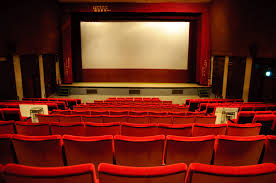

In [37]:
Image(filename='images.jpg',width=600, height=600)

In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# load the datasets
movie_titles_df = pd.read_csv('Movie_Id_Titles')

In [81]:
# checking data
movie_titles_df.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [82]:
# Let's load the second one!
movies_rating_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [83]:
#checking 2nd data
movies_rating_df.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [84]:
# Let's drop the timestamp 
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)

In [85]:
movies_rating_df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [86]:
# Let's merge both dataframes together so we can have ID with the movie name
movies_rating_df= pd.merge(movies_rating_df,movie_titles_df,on='item_id')

In [88]:
movies_rating_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [89]:
movies_rating_df.tail()

,user_id,item_id,rating,title
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."
100002,655,1641,3,Dadetown (1995)


In [90]:
movies_rating_df.shape

(100003, 4)

In [91]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [92]:
#Some more statistics
movies_rating_df.groupby('title')['rating'].describe().head()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.0,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.0,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.0,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.0,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.0,3.0,4.0,5.0


In [93]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [94]:
ratings_df_mean

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [106]:
ratings_df_count=movies_rating_df.groupby('title')['rating'].describe()['count']

In [107]:
ratings_df_count

title
'Til There Was You (1997)                                     9.0
1-900 (1994)                                                  5.0
101 Dalmatians (1996)                                       109.0
12 Angry Men (1957)                                         125.0
187 (1997)                                                   41.0
2 Days in the Valley (1996)                                  93.0
20,000 Leagues Under the Sea (1954)                          72.0
2001: A Space Odyssey (1968)                                259.0
3 Ninjas: High Noon At Mega Mountain (1998)                   5.0
39 Steps, The (1935)                                         59.0
8 1/2 (1963)                                                 38.0
8 Heads in a Duffel Bag (1997)                                4.0
8 Seconds (1994)                                              4.0
A Chef in Love (1996)                                         8.0
Above the Rim (1994)                                          5.0
Abso

In [108]:
ratings_mean_count_df = pd.concat([ratings_df_count,ratings_df_mean],axis=1)

In [109]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
5,2 Days in the Valley (1996),93.0,3.225806
6,"20,000 Leagues Under the Sea (1954)",72.0,3.500000
7,2001: A Space Odyssey (1968),259.0,3.969112
8,3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000
9,"39 Steps, The (1935)",59.0,4.050847


In [111]:
#Top 10 rating films
ratings_mean_count_df.sort_values(by='count',ascending=False).head(10)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


# Data Visualization for Mean & Count

In [112]:
import matplotlib.pyplot as plt

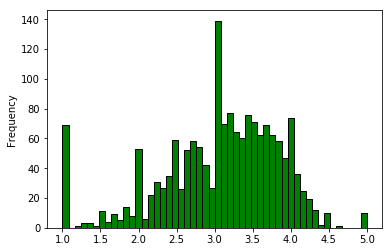

In [113]:
ratings_mean_count_df['mean'].plot(bins=50,kind='hist',color='g',edgecolor='black')

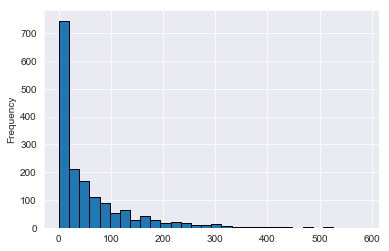

In [130]:
ratings_mean_count_df['count'].plot.hist(bins=30,edgecolor='black')

In [145]:
# Let's see the highest rated movies!
# Apparently these movies does not have many reviews (i.e.: small number of ratings)
ratings_mean_count_df[ratings_mean_count_df['mean'] ==5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [147]:
# List all the movies that are most rated
# Please note that they are not necessarily have the highest rating (mean)
ratings_mean_count_df.sort_values('count',ascending=False).head(50)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


# PERFORM ITEM-BASED COLLABORATIVE FILTERING ON ONE MOVIE SAMPLE

In [149]:
movies_rating_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [150]:
# To create rating matrix table
userid_movietitle_matrix = movies_rating_df.pivot_table(index='user_id',columns='title',values='rating')

In [151]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


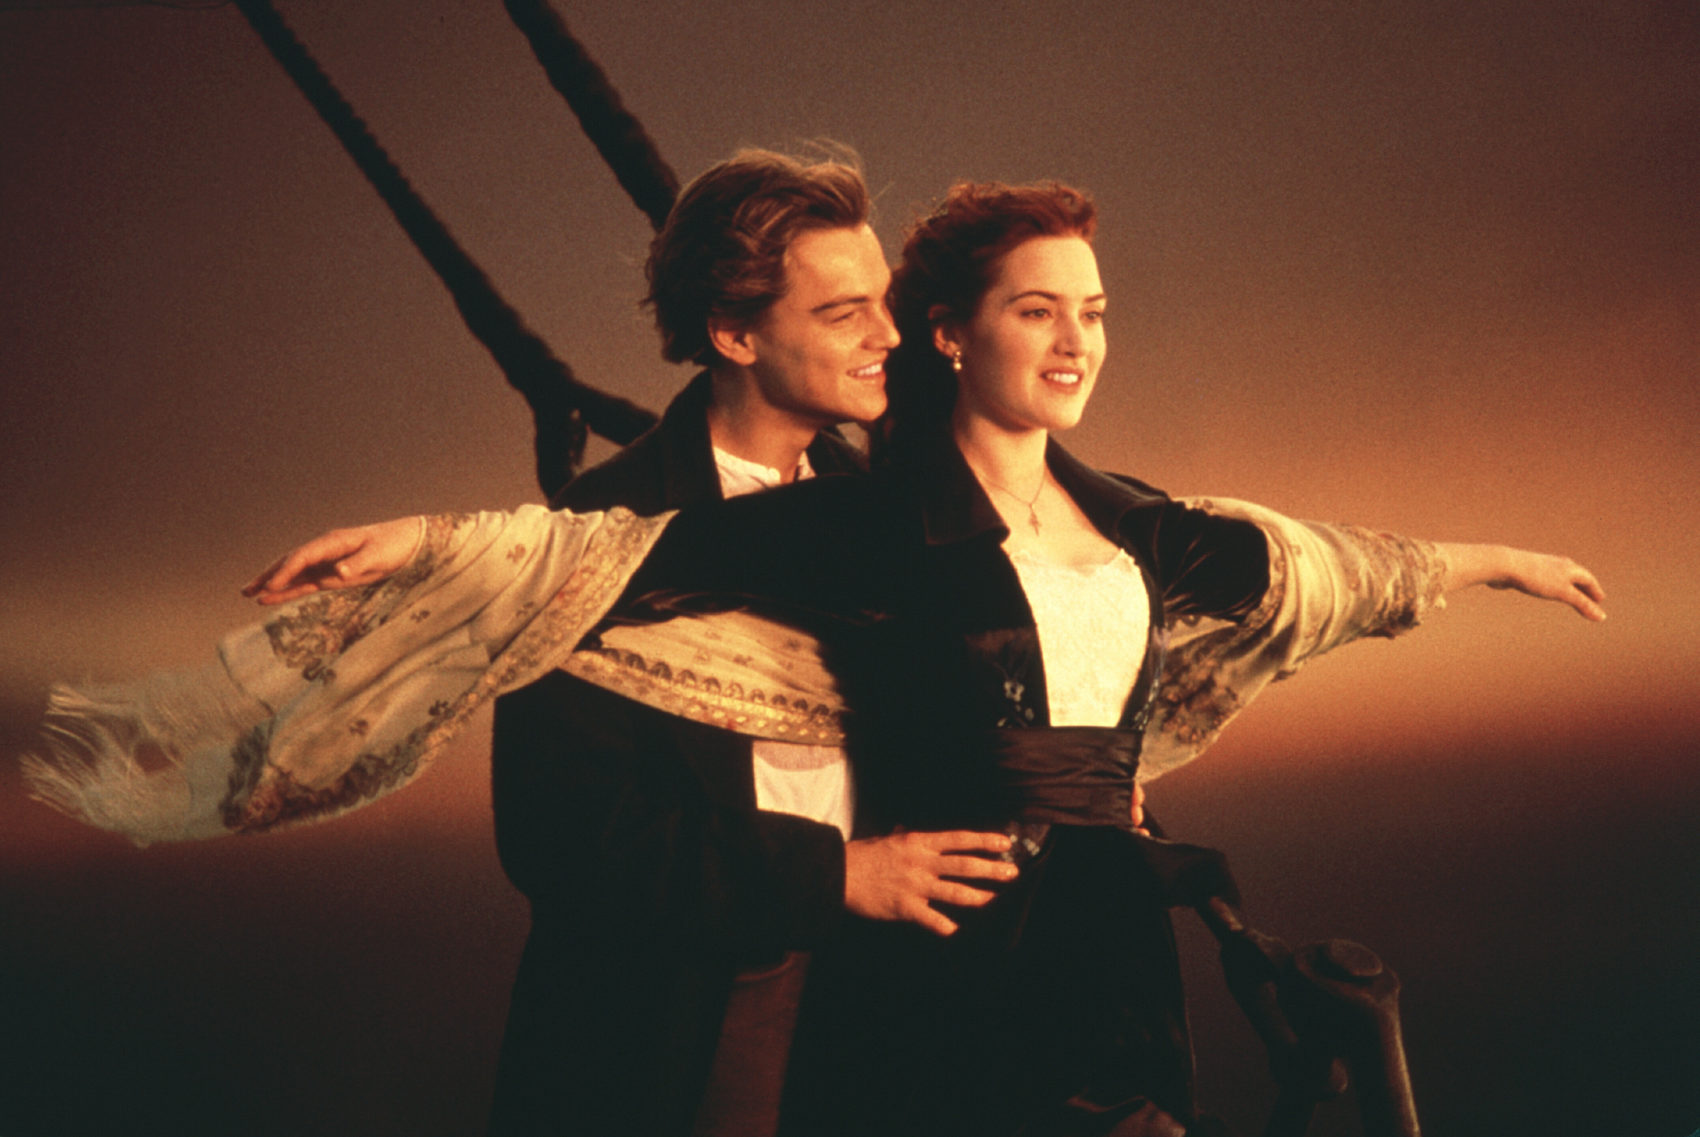

In [169]:
Image(filename='titanic.jpg',width=600,height=600)

In [155]:
# Finding titanic from the rating matrix table
titanic = userid_movietitle_matrix['Titanic (1997)']

In [157]:
titanic.head()

user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
Name: Titanic (1997), dtype: float64

In [160]:
# Let's calculate the correlations & join rating table
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlation'])
titanic_correlations =titanic_correlations.join(ratings_mean_count_df['count'])

In [163]:
titanic_correlations

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
"20,000 Leagues Under the Sea (1954)",0.246718,72.0
2001: A Space Odyssey (1968),-0.042024,259.0
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5.0


In [164]:
#Drop NA 
titanic_correlations.dropna(inplace=True)

In [167]:
#Sort correlation number closest to Titanic, as we can we Newton Boys is closest to Titanic but very  a few reviews
titanic_correlations.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
Nadja (1994),1.0,8.0
Hearts and Minds (1996),1.0,5.0


In [170]:
#Let's set a metric for at least 200 reviews for the movie it means more people had watched and reviewed for it. 
titanic_correlations[titanic_correlations['count']>200].sort_values('Correlation',ascending=False).head(10)

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
True Lies (1994),0.435104,208.0
Die Hard (1988),0.403124,243.0
Air Force One (1997),0.383730,431.0
Jurassic Park (1993),0.382785,261.0
E.T. the Extra-Terrestrial (1982),0.373201,300.0
Eraser (1996),0.371140,206.0
Twister (1996),0.362297,293.0
Dante's Peak (1997),0.357226,240.0


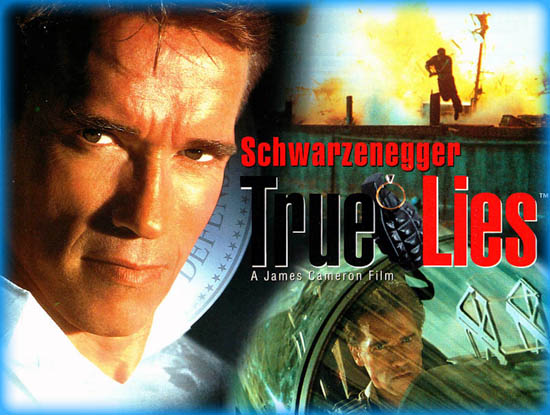

In [171]:
# So people watch Titanic 1997 would also like to watch True Lies 1994!
Image(filename='Truelies.jpg',width=600,height=600)

In [ ]:
#Let's do another movie 

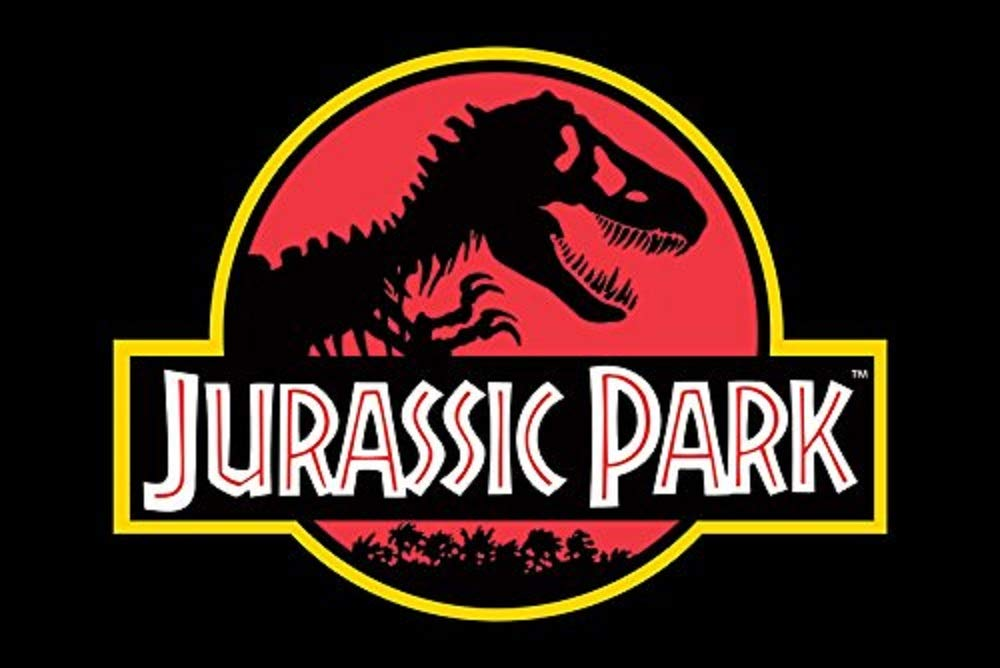

In [199]:
Image(filename="jurassic.jpg",width=600,height=600)

In [172]:
jurassic = userid_movietitle_matrix['Jurassic Park (1993)']

In [198]:
jurassic.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: Jurassic Park (1993), dtype: float64

In [200]:
 jurassic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(jurassic),columns=['Correlation'])

C:\Users\Windows 10\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Windows 10\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [201]:
 jurassic_correlations = jurassic_correlations.join(ratings_mean_count_df['count'])

In [202]:
jurassic_correlations.head()

,Correlation,count
title,,
'Til There Was You (1997),NaN,9.0
1-900 (1994),-1.000000,5.0
101 Dalmatians (1996),0.241175,109.0
12 Angry Men (1957),0.000711,125.0
187 (1997),0.485363,41.0


In [203]:
jurassic_correlations.dropna(inplace=True)

In [205]:
jurassic_correlations.sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Loch Ness (1995),1.0,4.0
Frisk (1995),1.0,3.0
Albino Alligator (1996),1.0,6.0
Love Serenade (1996),1.0,4.0
"Thin Line Between Love and Hate, A (1996)",1.0,12.0


In [206]:
jurassic_correlations[jurassic_correlations['count']>200].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Jurassic Park (1993),1.000000,261.0
"Game, The (1997)",0.453543,251.0
"Fugitive, The (1993)",0.451760,336.0
Back to the Future (1985),0.441965,350.0
Twister (1996),0.430985,293.0


In [ ]:
# The Game 1997 should be recommended for the audiences like Juarassic Park.

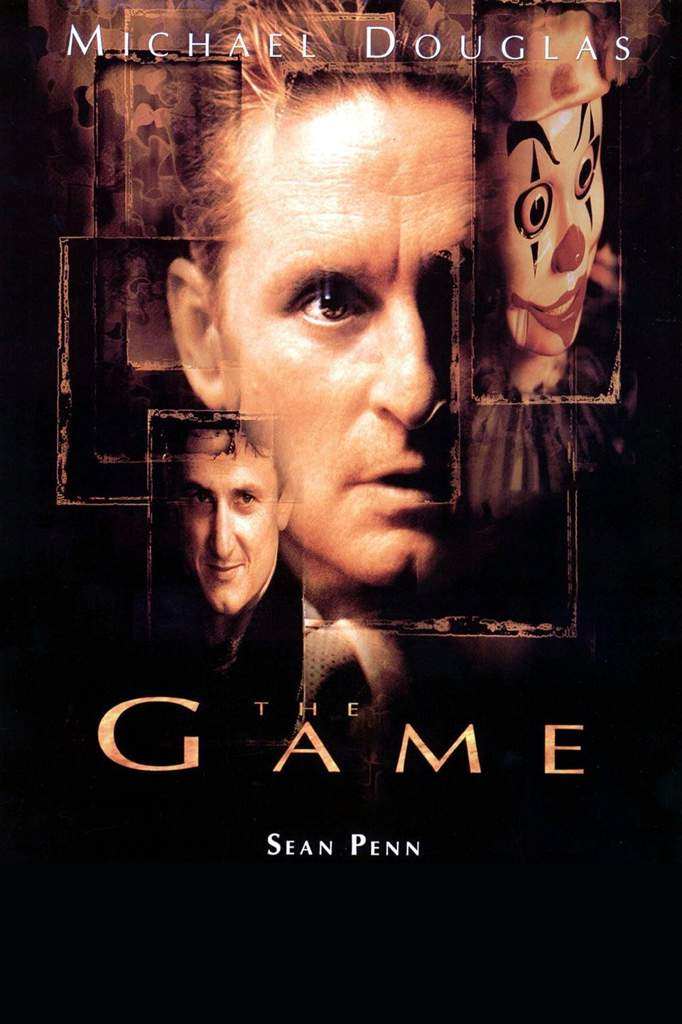

In [232]:
Image(filename='game.jpg',width=600,height=600)

In [217]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)

In [227]:
# Let's create our own dataframe with our own ratings!
myRatings = pd.read_csv('My_Ratings.csv')

In [228]:
myRatings

,Movie Name,Ratings
0,Star Wars (1977),4
1,Jurassic Park (1993),5


In [229]:
len(myRatings)

2

In [230]:
similar_movies_list = pd.Series()
for i in range(0,2):
    similar_movie= movie_correlations[myRatings['Movie Name'][i]].dropna()# Get same movies with same ratings
    similar_movie= similar_movie.map(lambda x:x*myRatings['Ratings'][i])
    similar_movies_list= similar_movies_list.append(similar_movie)

In [231]:
similar_movies_list.sort_values(ascending=False)

Jurassic Park (1993)                                                           5.000000
Star Wars (1977)                                                               4.000000
Empire Strikes Back, The (1980)                                                2.993410
Return of the Jedi (1983)                                                      2.690223
Young Guns (1988)                                                              2.264450
Fugitive, The (1993)                                                           2.258801
Back to the Future (1985)                                                      2.209827
Outbreak (1995)                                                                2.180301
Twister (1996)                                                                 2.154925
Raiders of the Lost Ark (1981)                                                 2.144468
Mission: Impossible (1996)                                                     2.125115
Independence Day (ID4) (1996)   

In [ ]:
#Done!